Step 1. Import Library and Read Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
diabetes = pd.read_csv('https://raw.githubusercontent.com/ammishra08/MachineLearning/refs/heads/master/Datasets/diabetes.csv',header=0,sep=',')

diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Step 2. Data Manipulation
  * Data Cleansing

In [ ]:
diabetes.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
# replace all 0's by numpy nan value
diabetes.loc[:, 'Glucose':'BMI'] = diabetes.loc[:,'Glucose':'BMI'].replace(0, np.nan)

In [ ]:
diabetes.isnull().sum()

,0
Pregnancies,0
Glucose,5
BloodPressure,35
SkinThickness,227
Insulin,374
BMI,11
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
diabetes['Insulin'].fillna(np.round(diabetes['Insulin'].mean()), inplace = True)

In [ ]:
from sklearn.impute import SimpleImputer
# strategy = 'mean', 'median' or 'most-frequent'
impute = SimpleImputer(missing_values=np.nan, strategy='median')

In [ ]:
impute.fit(diabetes)

SimpleImputer(strategy='median')

In [ ]:
diabetes_array = impute.transform(diabetes)

In [ ]:
diabetes_df = pd.DataFrame(diabetes_array, columns=diabetes.columns)

Ste 3. Data Preprocessing

In [ ]:
diabetes_df['Outcome'].unique()

array([1., 0.])

In [ ]:
diabetes_df['Outcome'] = diabetes_df['Outcome'].astype('int')

Step 4. Is Class Labels are Imbalanced ?

In [ ]:
diabetes_df['Outcome'].value_counts()

,count
Outcome,
0,500
1,268


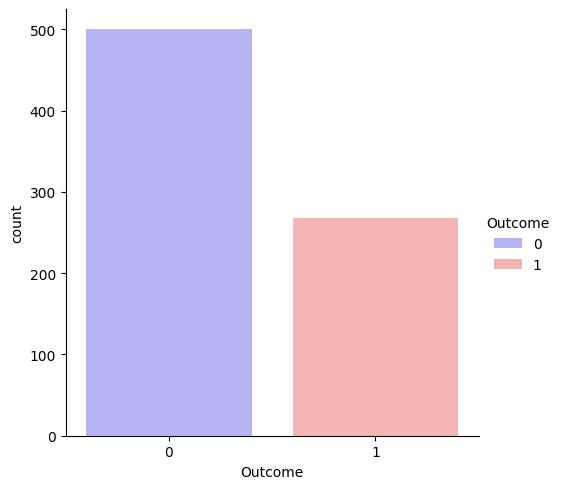

In [ ]:
sns.catplot(x='Outcome', kind='count', data=diabetes_df, hue='Outcome', palette='bwr')

Step 5. Prepare Data For Classification

In [ ]:
X = diabetes_df.drop('Outcome', axis=1)
Y = diabetes_df['Outcome']

In [ ]:
from imblearn.over_sampling import SMOTE
# SMOTE model uses K-Nearest neighbor to regenerate new-samples
oversample = SMOTE()
transformed_feature, transformed_label = oversample.fit_resample(X, Y)

In [ ]:
transformed_label.value_counts()

,count
Outcome,
1,500
0,500


Step 6. Is any any Multi-Collinearity ?

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
x = transformed_feature.astype(float)
vif = pd.DataFrame()
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(transformed_feature.values, i) for i in range(len(transformed_feature.columns))]
vif

,Features,VIF
0,Pregnancies,3.587576
1,Glucose,22.406099
2,BloodPressure,34.644748
3,SkinThickness,18.711885
4,Insulin,5.509382
5,BMI,36.894439
6,DiabetesPedigreeFunction,3.455443
7,Age,15.970851


Step 8. Train - Test Split

In [ ]:
from sklearn.model_selection import train_test_split
# test_size = 0.2, This indicates train_sample = 80% and test_sample_size = 20%
x_train, x_test, y_train, y_test = train_test_split(transformed_feature, transformed_label, test_size = 0.2, random_state=0)

Step 8. Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
logit_model = LogisticRegression(solver='liblinear', max_iter = 10000, penalty = 'l2' )
logit_model.fit(x_train, y_train)

LogisticRegression(max_iter=10000, solver='liblinear')

In [ ]:
logit_model.score(x_test, y_test)    # In classification model score is accuracy

0.8

Step 9. Classification Evaluations

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
y_pred = logit_model.predict(x_test)

In [ ]:
confusion_matrix(y_test, y_pred)

array([[84, 21],
       [19, 76]])

<Axes: >

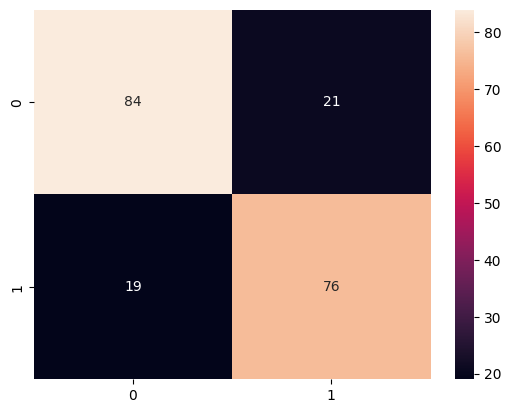

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.80      0.81       105
           1       0.78      0.80      0.79        95

    accuracy                           0.80       200
   macro avg       0.80      0.80      0.80       200
weighted avg       0.80      0.80      0.80       200



##### Final Prediction for New Sample

In [ ]:
new_data = x_test.sample(1)

In [ ]:
logit_model.predict(new_data)

array([1])